<hr/>

# EN.520.637 Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 3: Dynamic Programming and Monte Carlo Method  </font></h1>



## Deadline
11:59 pm Oct 26, 2020 (12 days)

##  Content
1. Gym environment
2. Dynamic Programming (GridWorld)
3. Monte Carlo Method


## 1. Gym library


Gym is a toolkit for developing and comparing reinforcement learning algorithms, (see https://gym.openai.com/). A bunch of [classic RL problems](https://gym.openai.com/envs/#classic_control) could be easily simulated. In particular, Gym environment provid all necessary variables (e.g. current state, next state and step reward) and the only thing remains for you to do is choosing action based on different algorithms, (please read https://gym.openai.com/docs/ for more details).

Run the following code to install:

In [ ]:
!pip install gym

In [ ]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython import display
import random

## 2. Dynamic Programming (GridWorld)

### 2.1 Intro to GridWorld

In this section, we apply policy iteration and value iteration to solve to gridworld problem. 

The grid is shown below, the black tiles represents wall/obstacles, the white tiles are the non-terminal tiles, and the tile with "s" is the starting point of every episoid, the tile with "5" is the goal point.

The agent start at "s" tile. At every step, the agent can choose one of the four actions:"up","right","down","left", moving to the next tile in that direction. 

$\cdot$ If the next tile is wall/obstacle, the agent does not move and receive -1 reward;

$\cdot$ If the next tile is a non-terminal tile, the agent move to that tile and receive 0 reward;

$\cdot$ If the next tile is the goal tile, the episoid is finished and the agent receive 5 reward.

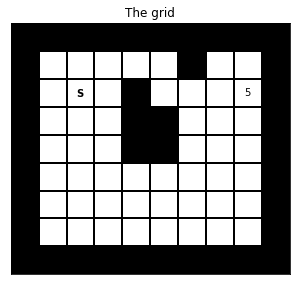

In [12]:
from gridworld import GridWorld

gw = GridWorld()
gw.plot_grid(plot_title='The grid')

### 2.1.1 States and state values
Excluding the wall around the grid, there are 56 tiles (INCLUDING obstacles inside the grid), and they correspond to 56 states (obstacles and goal are non-reachable states).

We use numbers from 0 to 55 to represent these states (see gridworld.py for the coversion between integer and tile position). The correspondance are as shown below:

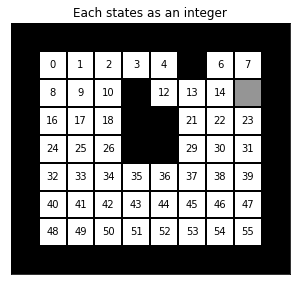

In [13]:
gw.plot_state_values(np.arange(56),value_format="{:d}",plot_title='Each states as an integer')

### 2.1.2 Take actions
Use GridWorld.step(action) to take an action, and use GridWorld.reset() to restart an episoid

action is an integer from 0 to 3

0: "Up"; 1: "Right"; 2: "Down"; 3: "Left" 

In [14]:
gw.reset()

current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)

print("The current state is {}, which corresponds to tile position {}\n".format(current_state,tile_pos))

action = np.random.randint(4)
reward, terminated, next_state = gw.step(action)
tile_pos = gw.int_to_state(next_state)

print("Take action {}, get reward {}, move to state {}".format(action,reward,next_state))
print("Now the current state is {}, which corresponds to tile position {}\n".format(next_state,tile_pos))

gw.reset()
current_state = gw.get_current_state()
tile_pos = gw.int_to_state(current_state)
print("Reset episode")
print("Now the current state is {}, which corresponds to tile position {}".format(current_state,tile_pos))



The current state is 9, which corresponds to tile position (1, 1)

Take action 2, get reward 0.0, move to state 17
Now the current state is 17, which corresponds to tile position (2, 1)

Reset episode
Now the current state is 9, which corresponds to tile position (1, 1)


### 2.1.3 Plot Deterministic Policies
A deterministic policy is a function from state to action, which can be represented by a (56,)-numpy array whose entries are all integers in (0-3)

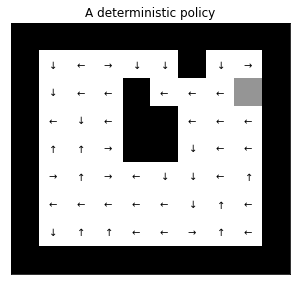

In [15]:
gw.plot_policy(np.random.randint(4,size=(56,)),plot_title='A deterministic policy')

### 2.2 Policy Evaluation

Recall that the value function $v_\pi(s)$ of a policy $\pi(s)$ can be iteratively computed via Policy Evaluation (See Sutton&Barto Section 4.1), the iteration is given by $$v_{k+1}(s)=\sum_{a}\pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma v_{k}(s)]\,,$$ which can be written as $$
    v_{k+1}(s)=\sum_{a}\pi(a|s)\left[\mathbb{E}_\pi[r|s,a]+\sum_{s'}p(s'|s,a)v_k(s')\right]\,.
$$
If we write value function $v_{k+1},v_k$ as vectors, then we have
$$
    v_{k+1} = \sum_{a}\pi(a|s)\left[R_\pi(a)+P_\pi(a)v_{k}\right]\,.
$$
where $R_\pi(a)$ is the expected reward under action $a$ and  $P_\pi(a)$ is the transition probability matrix under action $a$. 

With this we can find the value function $v_\pi$ of random policy $\pi$ when discount is 0.9, the code is shown below



In [ ]:
pi_a = [0.25,0.25,0.25,0.25] # action proability of random action (for any state)

gamma = 0.9
max_it = 1000
tol = 1e-5
v = np.zeros((56,))
for i in range(max_it):
    value_temp = np.zeros((56,))
    for action in range(4):
        reward, tran_prob = gw.transition(action)
        value_temp = value_temp + pi_a[action]*(reward+gamma* np.matmul(tran_prob,v))
    if np.linalg.norm(value_temp-v)<tol:
        break
    else:
        v = value_temp
        
v_final = v

gw.plot_state_values(v,value_format="{:.1f}",plot_title='Value function of Random Policy')

# compute and plot the greedy policy of this value function (Hint: first compute Q from v)

# write your code here


### 2.3 Value Iteration

Implement Value Iteration Algorithm (Sutton&Barto Section 4.4) to find the optimal policy of this gridworld, and plot its value function


In [ ]:
# Value Iteration Algorithm

def value_iteration(gridworld, gamma):
# input:  gridworld, (GridWorld class) gridworld class describing the environment
#         gamma,     (float 0-1) discount of the return
# output: optim value,  (1d numpy array, float) optimal value function 
#         optim_policy, (1d numpy array, int {0,1,2,3}) optimal policy

#write your code here
    

    return optim_value, optim_policy

In [ ]:
# check your result here
optim_value, optim_policy = value_iteration(gw, 0.9)
gw.plot_state_values(optim_value,value_format="{:.1f}",plot_title='Value function of Random Policy')
gw.plot_policy(optim_policy,plot_title='Greedy Policy of Random Policy')

## 3. Monte Carlo Method  (CartPole-v1 environment)

### 3.1 CartPole Introduction

We now apply Monte Carlo Method to the CartPole problem. 


1. A pole is attached via an un-actuated joint to a cart, which moves along a frictionless track. 

0. The system is controlled by applying a force of +1 or -1 to the cart. 

0. The pole starts at upright position, and the goal is to prevent it from falling over. 

0. A reward of +1 is obtained for every timestep that the pole remains upright. 

0. The episode ends when the pole is more than 15 degrees from the vertical, or the cart moves more than 2.4 units from the center.

0. For more info (See [SOURCE ON GITHUB](https://github.com/openai/gym/blob/master/gym/envs/classic_control/cartpole.py)).

The following examples show the basic usage of this testing environment: 



### 3.1.1 Episode initialization and Initial Value

In [16]:
env = gym.make('CartPole-v0')
observation = env.reset() ##Initial an episode

print("Inital observation is {}".format(observation))

print("\nThis means the cart current position is {}".format(observation[0]), end = '')
print(" with velocity {},".format(observation[1]))

print("and the pole current angular position is {}".format(observation[2]), end = '')
print(" with angular velocity {},".format(observation[3]))


Inital observation is [ 0.03472954 -0.02706774  0.01980837 -0.04862776]

This means the cart current position is 0.03472954227217041 with velocity -0.027067735180598497,
and the pole current angular position is 0.01980837406919167 with angular velocity -0.048627761309786924,


### 3.1.2 Take actions


Use env.step(action) to take an action

action is an integer from 0 to 1

0: "Left"; 1: "Right"

In [17]:
print("Current observation is {}".format(observation))

action = 0 #go left
observation, reward, done, info = env.step(action) # simulate one step

print("\nNew observation is {}".format(observation))
print("Step reward is {}".format(reward))
print("Did episode just ends? -{}".format(done)) # episode ends when 3.1(6) happens



Current observation is [ 0.03472954 -0.02706774  0.01980837 -0.04862776]

New observation is [ 0.03418819 -0.22246804  0.01883582  0.25023847]
Step reward is 1.0
Did episode just ends? -False


### 3.1.3 Simulate multiple episodes

(You may uncomment those lines to see an animation. However, it will not work for JupyterHub since the animation requires GL instead of webGL. If you have Jupyter notebook localy on your computer, this version of code will work through a virtual frame.)

In [8]:
env = gym.make('CartPole-v0')
observation = env.reset()
total_reward = 0
ep_num = 0
# img = plt.imshow(env.render(mode='rgb_array')) 


for _ in range(1000):
    #     img.set_data(env.render(mode='rgb_array')) 
    #     display.display(plt.gcf())
    #     display.clear_output(wait=True)
    
    action = env.action_space.sample()     # this takes random actions
    observation, reward, done, info = env.step(action) 
       
    total_reward += reward
    


    if done:                               # episode just ends
        observation = env.reset()          # reset episode
        ep_num += 1

print("Average reward per episode is {}".format(total_reward/ep_num))
env.close()


Average reward per episode is 20.833333333333332


### 3.1.4 States Discretization 

The class DiscreteObs() discretizes the observation space into discrete state space, based on numpy.digitize (Please read its description in https://numpy.org/doc/stable/reference/generated/numpy.digitize.html) 

Discretization of observation space is necessary for tabular methods. You can use DiscreteObs() or any other library for discretizing the observation space. 

In [18]:
class DiscretObs():
    
    
    def __init__(self, bins_list):
        self._bins_list = bins_list
        
        self._bins_num = len(bins_list)
        self._state_num_list = [len(bins)+1 for bins in bins_list]
        self._state_num_total = np.prod(self._state_num_list)
    
    def get_state_num_total(self):
        
        return self._state_num_total
    
    def obs2state(self, obs):
        
        if not len(obs)==self._bins_num:
            raise ValueError("observation must have length {}".format(self._bins_num))
        else:
            return [np.digitize(obs[i], bins=self._bins_list[i]) for i in range(self._bins_num)]
        
    def obs2idx(self, obs):
        
        state = self.obs2state(obs)
        
        return self.state2idx(state)
    
    def state2idx(self, state):
        
        idx = 0
        for i in range(self._bins_num-1,-1,-1):
            idx = idx*self._state_num_list[i]+state[i]
        
        return idx
    
    def idx2state(self, idx):
        
        state = [None]*self._bins_num
        state_num_cumul = np.cumprod(self._state_num_list)
        for i in range(self._bins_num-1,0,-1):
            state[i] = idx/state_num_cumul[i-1]
            idx -=state[i]*state_num_cumul[i-1]
        state[0] = idx%state_num_cumul[0]
        
        return state

# Recommended Discretization for Carpole-v1 when using Monte-Carlo methods
bins_pos = np.linspace(-2.4,2.4,40)        # position
bins_d_pos = np.linspace(-3,3,5)           # velocity
bins_ang = np.linspace(-0.2618,0.2618,40)  # angle
bins_d_ang = np.linspace(-0.3,0.3,5)       # angular velocity

dobs = DiscretObs([bins_pos,bins_d_pos,bins_ang,bins_d_ang])
observation = env.reset()

state = dobs.obs2state(observation)
idx = dobs.obs2idx(observation)

print("Current position of the cart is {:.4f}\n".format(observation[0]))
print("Current velocity of the cart is {:.4f}\n".format(observation[1]))
print("Current angular position of the pole is {:.4f} rad\n".format(observation[2]))
print("Current angular velocity of the pole is {:.4f} rad\n".format(observation[3]))

print("which are mapped to state {}, with corresponding index {}".format(state,idx))


Current position of the cart is -0.0460

Current velocity of the cart is -0.0451

Current angular position of the pole is -0.0479 rad

Current angular velocity of the pole is -0.0100 rad

which are mapped to state [20, 2, 16, 2], with corresponding index 24210


### 3.2 On-policy first-visit MC control

1. Implement "On-policy first-visit MC control" algorithum in [Chap. 5.4 Sutton&Barto]
2. Simulate this algorithm for 40000 episodes.
3. Divide the previous 40000 episodes into 20 sets. Plot the average reward for each set. (i.e. plot the average reward for the first 2000 episodes, the second 2000 episodes, ..., and the 15th 2000 episodes.) 
4. Use greedy policy of the trained Q function to control the carpole for 100 episodes, plot the accumulate reward over 100 episodes


In [ ]:
## Suggested functions (Feel free to modify existing and add new functions)

def get_action(current_state, Q, epsilon):
    
    # Choose optimal action based on current state and Q
    #
    # input:  current state,  (array) 
    #         Q,              (array)  
    #         epsilonn,       (float)  
    # output: action
    #         
    return action



def update_Q(Q, observation_list, action_list):
    # Update Q at the end of each episode
    #
    # input:  current Q, (array) 
    #         observation_list,       (array)  states observed in this episode
    #         action_list,       (array)  actions took in this spisode
    # output: Updated Q
    #         

        
    return Q


## Suggested flow (Feel free to modify and add)

# parameters for epsilon-greedy algorithm, when epsilon_decay_rate=1, the algorothm implement a fixed 
# epsilon value as epsilon_start, you can choose either fixed epsilon or decaying epsilon

# epsilon_start = 0.3
# epsilon_decay_rate = 0.97

set_num = 30
s = 0
env = gym.make('CartPole-v1')
observation = env.reset()

#epsilon = epsilon_start   # set epsilon

while 1:
    
    
    current_state =                             # discretize the observation space
    
    action = get_action(current_state,Q,epsilon)# pick action by epsilon greedy policy
    
    observation, reward, done, info = env.step(action) # simulate one step
    
    if done:  # end of epsode
        Q = update_Q(Q, observation_list, action_list) # update Q for past observations in the episode
        
        ep_num += 1
        
        if  np.mod(ep_num,2000)==0: # end of every set of episode
            
            #epsilon = epsilon*epsilon_decay_rate     # update epsilon
            s+=1
            
            if s == set_num:
                break
env.close()

In [ ]:
# check your result here (Feel free to modify)
# the result_mc should be a (set_num, )-numpy array that records the average reward of a set of episodes 

# put your result here
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

figure(figsize=(12,6))
ax = subplot(1,1,1)
ax.plot(range(0,set_num), result_mc, linewidth=2, color='g')

plt.ylabel("Set average reward");
plt.xlabel("Set number (2000 episodes simulated in each set)");


In [ ]:
# Use greedy policy of the trained Q function to control the carpole for 100 episode, 
# and plot the total reward received in each episode
## Suggested flow (Feel free to modify and add)

env = gym.make('CartPole-v1')
observation = env.reset()

# img = plt.imshow(env.render(mode='rgb_array')) 

count = 0
while 1:
    #     img.set_data(env.render(mode='rgb_array')) 
    #     display.display(plt.gcf())
    #     display.clear_output(wait=True)
    
    current_state =                             # discretize the observation space
    
    action =                                    # choose action by greedy policy of the trained Q
    
    observation, reward, done, info = env.step(action)
    
    
    if done:
        
        observation = env.reset()
        count +=1
        
        total_reward_mc =                                # record the total reward until this episode
        
        if count==100:
            break
        
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

figure(figsize=(12,6))
ax = subplot(1,1,1)
ax.plot(range(100), total_reward_mc)

plt.ylabel("Accumulate Reward");
plt.xlabel("Episode");
    

### 3.3 MC Control with partially observed states

Now suppose we are only able to observe the position of the cart and angle of the pole, i.e. observation[0] and observation[2]. Using same state discretization for these two states in 3.2, run MC control:

1.Simulate this algorithm for 40000 episodes.

2.Divide the previous 40000 episodes into 20 sets. Plot average rewards for each sets. (i.e. plot average rewards for the first 2000 episodes, the second 2000 episodes, ..., and the 15th 2000 episodes.).

3.Use greedy policy of the trained Q function to control the carpole for 100 episode, plot the accumulate rewards over 100 episodes, and compare it with one from 3.2 in the same figure.

In [ ]:
## Suggested flow (Feel free to modify and add)

# parameters for epsilon-greedy algorithm, when epsilon_decay_rate=1, the algorothm implement a fixed 
# epsilon value as epsilon_start, you can choose either fixed epsilon or decaying epsilon

# epsilon_start = 0.3
# epsilon_decay_rate = 0.97

set_num = 30
s = 0
env = gym.make('CartPole-v1')

observation = env.reset()
observation = observation([[0,2]])  # partially observed states

#epsilon = epsilon_start   # set epsilon

while 1:
    
    
    current_state =                             # discretize the observation space
    
    action = get_action(current_state,Q,epsilon)# pick action by epsilon greedy policy
    
    observation, reward, done, info = env.step(action) # simulate one step
    observation = observation([[0,2]])  # partially observed states
    
    if done:  # end of epsode
        Q = update_Q(Q, observation_list, action_list) # update Q for past observations in the episode
        
        ep_num += 1
        
        if  np.mod(ep_num,2000)==0: # end of every set of episode
            
            #epsilon = epsilon*epsilon_decay_rate     # update epsilon
            s+=1
            
            if s == set_num:
                break
env.close()

In [ ]:
# check your result here (Feel free to modify)
# the result_p_mc should be a (set_num, )-numpy array that records the average reward of a set of episodes 

# put your result here
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

figure(figsize=(12,6))
ax = subplot(1,1,1)
ax.plot(range(0,set_num), result_p_mc, linewidth=2, color='g')

plt.ylabel("Set average reward");
plt.xlabel("Set number (2000 episodes simulated in each set)");

In [ ]:
# Use greedy policy of the trained Q function to control the carpole for 100 episode, 
# and plot the accumulate reward
## Suggested flow (Feel free to modify and add)

env = gym.make('CartPole-v1')
observation = env.reset()
observation = observation([[0,2]])          # partially observed states
# img = plt.imshow(env.render(mode='rgb_array')) 

count = 0
while 1:
    #     img.set_data(env.render(mode='rgb_array')) 
    #     display.display(plt.gcf())
    #     display.clear_output(wait=True)
    
    current_state =                             # discretize the observation space
    
    action =                                    # choose action by greedy policy of the trained Q
    
    observation, reward, done, info = env.step(action)
    observation = observation([[0,2]])          # partially observed states
    
    if done:
        
        observation = env.reset()
        count +=1
        
        total_reward_p_mc =                                # record the accumulate reward until this episode
        
        if count==100:
            break
        
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)

figure(figsize=(12,6))
ax = subplot(1,1,1)
ax.plot(range(100), total_reward_p_mc,range(100), total_reward_mc) # compare with section 3.2

plt.ylabel("Accumulate Reward");
plt.xlabel("Episode");